In [1]:
pwd

'D:\\padhai\\kaggle'

# Import the required libraries and load the data:

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
#Loading of dataset
df = pd.read_csv('renttherunway.csv')
df.head()


,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [4]:
df.info

<bound method DataFrame.info of         Unnamed: 0  fit  user_id bust size  item_id  weight  rating  \
0                0  fit   420272       34d  2260466  137lbs    10.0   
1                1  fit   273551       34b   153475  132lbs    10.0   
2                2  fit   360448       NaN  1063761     NaN    10.0   
3                3  fit   909926       34c   126335  135lbs     8.0   
4                4  fit   151944       34b   616682  145lbs    10.0   
...            ...  ...      ...       ...      ...     ...     ...   
192539      192539  fit    66386      34dd  2252812  140lbs    10.0   
192540      192540  fit   118398       32c   682043  100lbs    10.0   
192541      192541  fit    47002       36a   683251  135lbs     6.0   
192542      192542  fit   961120       36c   126335  165lbs    10.0   
192543      192543  fit   123612       36b   127865  155lbs    10.0   

           rented for                                        review_text  \
0            vacation  An adorable romp

In [5]:
df.shape

(192544, 16)

In [6]:
df.describe()

,Unnamed: 0,user_id,item_id,rating,size,age
count,192544.000000,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,96271.500000,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,55582.809453,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,0.000000,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,48135.750000,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,96271.500000,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,144407.250000,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,192543.000000,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


# Data cleansing and Exploratory data analysis

In [7]:
len(df[df.duplicated()])
# so we dont have any duplicate record


0

# Drop the columns which you think redundant for the analysis.(Hint: drop
columns like ‘id’, ‘review’)

In [8]:
df = df.drop(['user_id', 'item_id', 'review_date','Unnamed: 0'], axis=1)


In [9]:
df.head(40)

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,fit,34d,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0
1,fit,34b,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0
3,fit,34c,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0
4,fit,34b,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0
5,fit,32b,138lbs,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,"5' 8""",8,45.0
6,fit,34c,112lbs,10.0,everyday,This dress is so sweet. I loved the print. The...,hourglass,LITERALLY THE CUTEST DRESS EVER,dress,"5' 3""",4,27.0
7,fit,34d+,118lbs,10.0,formal affair,Fit was great. Maybe a little tight under the ...,full bust,"Great dress, beautifully made. I received lot...",dress,"5' 3""",8,65.0
8,fit,36d,NaN,10.0,formal affair,I was nervous of it looking cheap when it arri...,full bust,Great for black tie event!,gown,"5' 6""",21,27.0
9,fit,32b,114lbs,10.0,formal affair,The dress was very flattering and fit perfectl...,petite,This dress was everything! It was perfect for ...,gown,"5' 3""",1,33.0


# Check the column 'weight', Is there any presence of string data? If yes, remove
#the string data and convert to float. (Hint: 'weight' has the suffix as lbs) (

In [10]:

# Check for presence of string data in 'weight' column
has_string_data = df['weight'].str.contains('lbs', na=False).any()

if has_string_data:
    # Remove string data and convert to float
    df['weight'] = df['weight'].str.replace('lbs', '').astype(float)
df.head()

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age
0,fit,34d,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0
1,fit,34b,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0
2,fit,NaN,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0
3,fit,34c,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0
4,fit,34b,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0


# replace('party: cocktail', 'party')

In [11]:
unique_categories = df['rented for'].unique()
unique_categories

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [12]:
df['rented for'] = df['rented for'].replace('party: cocktail', 'party')

In [13]:
unique_categories = df['rented for'].unique()
unique_categories

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

# converting height columns into inches

In [14]:

# Convert 'height' from feet to inches and update the data type
df['height'] = df['height'].str.replace("'", '.')
df['height'] = df['height'].str.replace(" ", '')

df['height'] = df['height'].str.replace('"', '').astype(float) 
def convert_height(height):
    try:
        feet, inches = map(int, str(height).split('.'))
        total_inches = (feet * 12) + inches
        return total_inches
    except:
        return None

# Apply the conversion function to the 'height' column
df['heightINCH'] = df['height'].apply(convert_height)

# Check for missing values in each column of the dataset? If it exists, impute
#them with appropriate methods. (3)

In [15]:
df.head(5)

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,heightINCH
0,fit,34d,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,5.8,14,28.0,68.0
1,fit,34b,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,5.6,12,36.0,66.0
2,fit,NaN,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,5.4,4,116.0,64.0
3,fit,34c,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,5.5,8,34.0,65.0
4,fit,34b,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,5.9,12,27.0,69.0


In [16]:
df = df.drop(['height'], axis=1)
missing_values = df.isnull().sum()
missing_values

fit                   0
bust size         18411
weight            29982
rating               82
rented for           10
review_text          62
body type         14637
review_summary      345
category              0
size                  0
age                 960
heightINCH          677
dtype: int64

# #dropped rows which have more than two missing column.This very imp because we cant predict anything if more than two values are missing.

In [17]:

df.dropna(thresh=df.shape[1]-1, inplace=True)

In [18]:
missing_values = df.isnull().sum()
missing_values

fit                   0
bust size          6682
weight            18277
rating               50
rented for            0
review_text          15
body type          4562
review_summary      208
category              0
size                  0
age                 317
heightINCH          363
dtype: int64

# handling missing data of 'bust size ' is a bit repeatative as 'dd' and 'e' are replaceble

In [19]:
bust_size_counts = df['bust size'].value_counts()

# Print the value counts
print(bust_size_counts)

34b    26735
34c    22657
34d    17642
36c    13181
32d    10994
       ...  
28h        1
46c        1
42h        1
40i        1
44h        1
Name: bust size, Length: 104, dtype: int64


In [20]:
df.shape

(176611, 12)

In [21]:
df['bust size'] = df['bust size'].replace({'30ddd/e':'30f','32ddd/e': '32f', '34ddd/e': '34f','36ddd/e':'36f','38ddd/e':'38f','40ddd/e':'40f',})


In [22]:
df['bust size'] = df['bust size'].replace({'28dd':'28e','30dd':'30e','32dd': '32e', '34dd': '34e','36dd':'36e','38dd':'38e','40dd':'40e','42dd':'42e','44dd':'44e'})


In [23]:
bust_size_counts = df['bust size'].value_counts()

first_column = bust_size_counts.index

first_column

Index(['34b', '34c', '34d', '36c', '32d', '36d', '32b', '32c', '36b', '34a',
       '32a', '38d', '38c', '34e', '36a', '32e', '36e', '34d+', '34f', '38b',
       '36d+', '32d+', '32f', '38d+', '36f', '38e', '32aa', '34aa', '38f',
       '30d', '30c', '30f', '40d', '32g', '34g', '40e', '30b', '30e', '36g',
       '40c', '38a', '30a', '28b', '36aa', '28a', '34h', '40f', '42e', '28c',
       '42c', '38g', '42d', '44e', '28e', '32h', '42ddd/e', '30g', '38h',
       '28f', '36h', '40g', '34i', '30h', '40b', '28aa', '34j', '44ddd/e',
       '44c', '28ddd/e', '42b', '40h', '44d', '30aa', '38aa', '32j', '32i',
       '28g', '36i', '42g', '28d', '42f', '36j', '44f', '44b', '38j', '38i',
       '48dd', '30i', '46ddd/e', '44g', '48d', '40j', '42j', '46c', '28h',
       '42h', '40i', '44h'],
      dtype='object')

# Replacing nan with top10 bustsize randomally,

In [24]:
import pandas as pd
import random

# Replace NA randomly with bust size values
bust_sizes = ['34b', '34c', '34d', '36c', '32d', '36d', '32b', '32c', '36b', '34a']
df['bust size'] = df['bust size'].fillna(random.choice(bust_sizes))

# Print the updated DataFrame
print(df['bust size'])

0         34d
1         34b
3         34c
4         34b
5         32b
         ... 
192539    34e
192540    32c
192541    36a
192542    36c
192543    36b
Name: bust size, Length: 176611, dtype: object


# converting the bustsize with numerical value but should not be replace with label encoder because it will replace any value with any number. So, try to assign value in a systematic order.In case, 32aa or any + value it will throw an error, so convert it into numerical value + 3.

In [25]:
def convert_size(s):
    indi = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
    
    try:
        number = int(s[:2]) + indi.index(s[-1]) * 2
        return number
    except:
        return int(s[:2]) + 3

df['bust size new'] = df['bust size'].apply(convert_size)


In [26]:
bust_size_counts = df['bust size new'].value_counts()
bust_size_counts

36    45497
38    43290
40    33628
34    18767
42    16759
44     6895
32     5460
37     1384
46     1324
39      930
35      912
41      651
48      526
50      216
30      150
52      109
28       65
54       37
56        7
58        3
60        1
Name: bust size new, dtype: int64

In [27]:
bust_size_counts = df['body type'].value_counts()
bust_size_counts

hourglass            53405
athletic             42552
petite               21557
pear                 21311
straight & narrow    14304
full bust            14250
apple                 4670
Name: body type, dtype: int64

finding the volume of a person


In [28]:
df

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,size,age,heightINCH,bust size new
0,fit,34d,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,14,28.0,68.0,40
1,fit,34b,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,12,36.0,66.0,36
3,fit,34c,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,8,34.0,65.0,38
4,fit,34b,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,12,27.0,69.0,36
5,fit,32b,138.0,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,8,45.0,68.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34e,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,8,42.0,69.0,42
192540,fit,32c,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,4,29.0,61.0,36
192541,fit,36a,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,8,31.0,68.0,36
192542,fit,36c,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,16,31.0,66.0,40


In [29]:
missing_values = df.isnull().sum()
missing_values

fit                   0
bust size             0
weight            18277
rating               50
rented for            0
review_text          15
body type          4562
review_summary      208
category              0
size                  0
age                 317
heightINCH          363
bust size new         0
dtype: int64

# replacing nan of body type with top 3 values

In [30]:
import pandas as pd
import random

# Replace NA randomly with bust size values
body_type = ['hourglass', 'athletic', 'petite']
df['body type'] = df['body type'].fillna(random.choice(body_type))

# Print the updated DataFrame


In [31]:
value_counts = df['body type'].value_counts()
value_counts


hourglass            53405
athletic             47114
petite               21557
pear                 21311
straight & narrow    14304
full bust            14250
apple                 4670
Name: body type, dtype: int64

In [32]:
missing_values = df.isnull().sum()
missing_values

fit                   0
bust size             0
weight            18277
rating               50
rented for            0
review_text          15
body type             0
review_summary      208
category              0
size                  0
age                 317
heightINCH          363
bust size new         0
dtype: int64

#replacing 'age' and 'heightINCH' with its mean, because nan percentage is less than .2

In [33]:
from sklearn.impute import SimpleImputer



# Replace missing values with mean
imputer = SimpleImputer(strategy='mean')
df[['age', 'heightINCH']] = imputer.fit_transform(df[['age', 'heightINCH']])


In [34]:
missing_values = df.isnull().sum()
missing_values

fit                   0
bust size             0
weight            18277
rating               50
rented for            0
review_text          15
body type             0
review_summary      208
category              0
size                  0
age                   0
heightINCH            0
bust size new         0
dtype: int64

# weight column has more 10% missing values then it should not be replaced with mean, median or mode.  first we train our model to predict 'weight' then check its accuracy with 5% error.

In [35]:
#now we will try to predict weight column with these feaures using ada boost model
features = [ 'size', 'heightINCH','bust size new']
target = 'weight'
df.head(5)

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,size,age,heightINCH,bust size new
0,fit,34d,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,14,28.0,68.0,40
1,fit,34b,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,12,36.0,66.0,36
3,fit,34c,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,8,34.0,65.0,38
4,fit,34b,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,12,27.0,69.0,36
5,fit,32b,138.0,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,8,45.0,68.0,34


In [36]:
X = df[features]
y = df[target]


In [37]:
# Create a new DataFrame without NaN values in the 'weight' column
data_clean = df.dropna(subset=[target])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data_clean[features], data_clean[target], test_size=0.2, random_state=42)

# Handle missing values in the training set
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)

# Handle missing values in the test set
X_test_imputed = imputer.transform(X_test)
print("ok")

ok


In [38]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor
# Train the AdaBoost model
adaboost = AdaBoostRegressor(n_estimators=100, random_state=42)
adaboost.fit(X_train_imputed, y_train)

# Predict weight for the test set
y_pred = adaboost.predict(X_test_imputed)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 145.24784301486497


In [39]:
# Define a threshold range for correct predictions
threshold = 5

# Convert regression problem into a classification problem
y_pred_class = (abs(y_pred - y_test) <= threshold)

# Calculate accuracy
accuracy = sum(y_pred_class) / len(y_pred_class)

# Print accuracy
print('Accuracy:', accuracy)


Accuracy: 0.3577541289039063


In [40]:
# Define the acceptable range for correct predictions (5% error)
tolerance = 0.05  # 5% error

# Calculate the lower and upper bounds for the acceptable range
lower_bound = y_test * (1 - tolerance)
upper_bound = y_test * (1 + tolerance)

# Convert regression problem into a classification problem
y_pred_class = ((y_pred >= lower_bound) & (y_pred <= upper_bound))

# Calculate accuracy
accuracy = sum(y_pred_class) / len(y_pred_class)

# Print accuracy
print('Accuracy:', accuracy*100)


Accuracy: 46.932137556446776


In [41]:
missing_values = df.isnull().sum()
missing_values

fit                   0
bust size             0
weight            18277
rating               50
rented for            0
review_text          15
body type             0
review_summary      208
category              0
size                  0
age                   0
heightINCH            0
bust size new         0
dtype: int64

# replace weight na with predicted values but still has some values which can be replaced by median of weight

In [42]:
# Handle missing values in the original dataset
X_original = imputer.transform(df[features])

# Predict weight for the original dataset
weight_pred = adaboost.predict(X_original)

# Replace NaN values in the 'weight' column with the predicted values
df['weight'] = df['weight'].fillna(pd.Series(weight_pred))

# Verify if NaN values have been replaced
print(df['weight'].isnull().sum())


1494


In [43]:
df

,fit,bust size,weight,rating,rented for,review_text,body type,review_summary,category,size,age,heightINCH,bust size new
0,fit,34d,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,14,28.0,68.0,40
1,fit,34b,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,12,36.0,66.0,36
3,fit,34c,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,8,34.0,65.0,38
4,fit,34b,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,12,27.0,69.0,36
5,fit,32b,138.0,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,8,45.0,68.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,34e,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,8,42.0,69.0,42
192540,fit,32c,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,4,29.0,61.0,36
192541,fit,36a,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,8,31.0,68.0,36
192542,fit,36c,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,16,31.0,66.0,40


In [44]:
missing_values = df.isnull().sum()
missing_values

fit                  0
bust size            0
weight            1494
rating              50
rented for           0
review_text         15
body type            0
review_summary     208
category             0
size                 0
age                  0
heightINCH           0
bust size new        0
dtype: int64

In [45]:
# Replace missing values in the 'rating' column with 8
df['rating'] = df['rating'].fillna(8)
# Replace missing values in the 'review_text' column with "good"
df['review_text'] = df['review_text'].fillna("that was a good product,but could be better")
df['review_summary'] = df['review_summary'].fillna("good")


In [46]:
missing_values = df.isnull().sum()
missing_values

fit                  0
bust size            0
weight            1494
rating               0
rented for           0
review_text          0
body type            0
review_summary       0
category             0
size                 0
age                  0
heightINCH           0
bust size new        0
dtype: int64

In [47]:


imputer = SimpleImputer(strategy='median')
df['weight'] = imputer.fit_transform(df[['weight']])


In [48]:
missing_values = df.isnull().sum()
missing_values

fit               0
bust size         0
weight            0
rating            0
rented for        0
review_text       0
body type         0
review_summary    0
category          0
size              0
age               0
heightINCH        0
bust size new     0
dtype: int64

In [49]:
df = df.drop('bust size', axis=1)

In [50]:
cleanDF=df.copy()

In [51]:
cleanDF

,fit,weight,rating,rented for,review_text,body type,review_summary,category,size,age,heightINCH,bust size new
0,fit,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,14,28.0,68.0,40
1,fit,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,12,36.0,66.0,36
3,fit,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,8,34.0,65.0,38
4,fit,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,12,27.0,69.0,36
5,fit,138.0,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,8,45.0,68.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...
192539,fit,140.0,10.0,work,Fit like a glove!,hourglass,LOVE IT!!! First Item Im thinking of buying!,jumpsuit,8,42.0,69.0,42
192540,fit,100.0,10.0,work,The pattern contrast on this dress is really s...,petite,LOVE it!,dress,4,29.0,61.0,36
192541,fit,135.0,6.0,everyday,"Like the other DVF wraps, the fit on this is f...",straight & narrow,"Loud patterning, flattering fit",dress,8,31.0,68.0,36
192542,fit,165.0,10.0,wedding,This dress was PERFECTION. it looked incredib...,pear,loved this dress it was comfortable and photog...,dress,16,31.0,66.0,40


In [52]:
value_counts = df['body type'].value_counts().head(20)
value_counts

hourglass            53405
athletic             47114
petite               21557
pear                 21311
straight & narrow    14304
full bust            14250
apple                 4670
Name: body type, dtype: int64

#  Check the statistical summary for the numerical and categorical columns and
#write your findings.

In [53]:
# Statistical summary for numerical columns
numerical_summary = cleanDF.describe()

# Statistical summary for categorical columns
categorical_summary = cleanDF.describe(include='object')

# Print the summaries
print("Numerical Summary:\n", numerical_summary)
print("\nCategorical Summary:\n", categorical_summary)

Numerical Summary:
               weight         rating           size            age  \
count  176611.000000  176611.000000  176611.000000  176611.000000   
mean      137.611837       9.086523      12.044097      33.916826   
std        21.434640       1.432933       8.289298       8.045830   
min        50.000000       2.000000       0.000000       0.000000   
25%       124.000000       8.000000       7.000000      29.000000   
50%       135.000000      10.000000      12.000000      32.000000   
75%       148.000000      10.000000      16.000000      37.000000   
max       300.000000      10.000000      58.000000     117.000000   

          heightINCH  bust size new  
count  176611.000000  176611.000000  
mean       64.962405      37.968988  
std         2.655018       2.977023  
min        49.000000      28.000000  
25%        63.000000      36.000000  
50%        65.000000      38.000000  
75%        67.000000      40.000000  
max        78.000000      60.000000  

Categorical Sum

# Are there outliers present in the column age? If yes, treat them with the
#appropriate method.

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1b2d6e670>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1b2d6ebb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1b2d6e3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1b2d35130>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1b2d353d0>],
 'means': []}

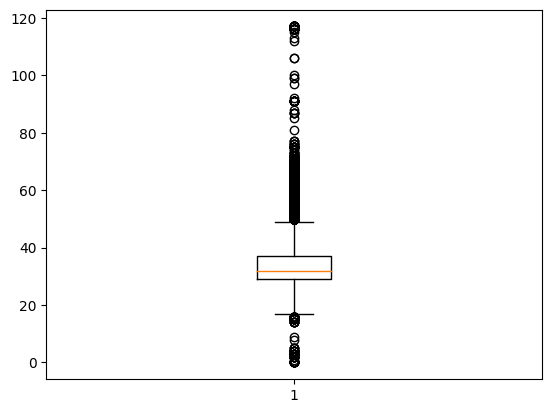

In [54]:
plt.boxplot(cleanDF['age'])

In [55]:
age_summary = cleanDF['age'].describe()
age_summary

count    176611.000000
mean         33.916826
std           8.045830
min           0.000000
25%          29.000000
50%          32.000000
75%          37.000000
max         117.000000
Name: age, dtype: float64

In [56]:
Q1 = cleanDF['age'].quantile(0.25)
Q3 = cleanDF['age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = len(cleanDF[(cleanDF['age'] < lower_bound) | (cleanDF['age'] > upper_bound)])

print("Number of outliers: ", outliers_count)

Number of outliers:  9459


In [57]:
#replacing any value less than with 14 and any value greater than  60 as 60

In [58]:
cleanDF['age'] = cleanDF['age'].clip(lower=14, upper=60)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c1afd10b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c1afd220d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c1afd108b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c1afd22610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c1afd228b0>],
 'means': []}

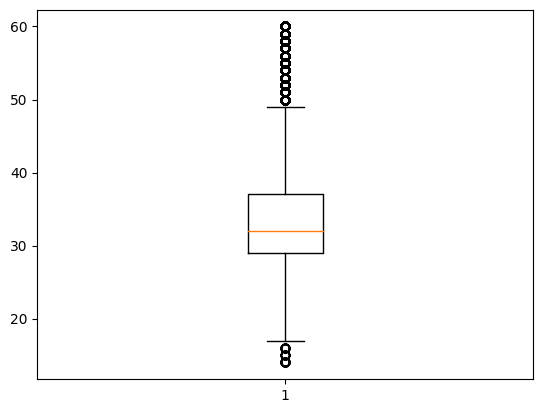

In [59]:
plt.boxplot(cleanDF['age'])

In [60]:
age_summary = cleanDF['age'].describe()
age_summary

count    176611.000000
mean         33.865386
std           7.761519
min          14.000000
25%          29.000000
50%          32.000000
75%          37.000000
max          60.000000
Name: age, dtype: float64

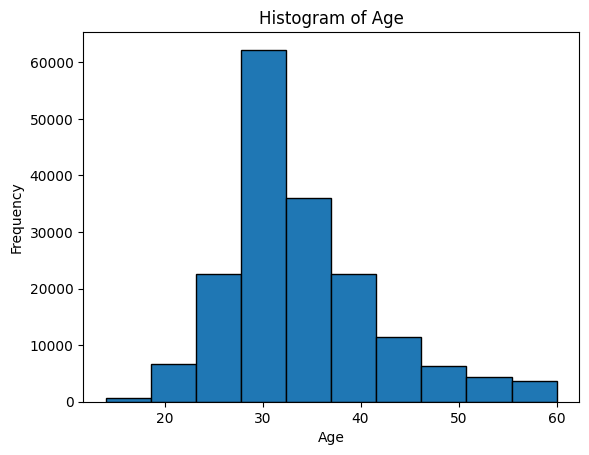

In [61]:
plt.hist(cleanDF['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

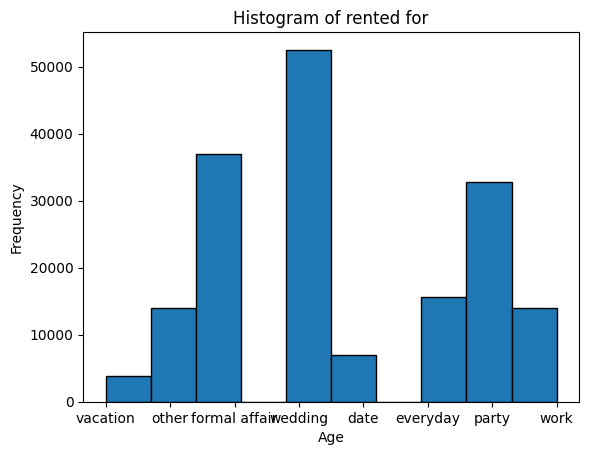

In [62]:
plt.hist(cleanDF['rented for'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of rented for')
plt.show()

In [63]:
cleanDF.head()

,fit,weight,rating,rented for,review_text,body type,review_summary,category,size,age,heightINCH,bust size new
0,fit,137.0,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,14,28.0,68.0,40
1,fit,132.0,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,12,36.0,66.0,36
3,fit,135.0,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,8,34.0,65.0,38
4,fit,145.0,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,12,27.0,69.0,36
5,fit,138.0,8.0,date,Didn't actually wear it. It fit perfectly. The...,athletic,Traditional with a touch a sass,dress,8,45.0,68.0,34


# Data Preparation for model building

# Encode the categorical variables in the dataset

In [64]:
encoded_df = pd.get_dummies(cleanDF, columns=['fit', 'rented for', 'body type', 'category'])
encoded_df

,weight,rating,review_text,review_summary,size,age,heightINCH,bust size new,fit_fit,fit_large,...,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest
0,137.0,10.0,An adorable romper! Belt and zipper were a lit...,So many compliments!,14,28.0,68.0,40,1,0,...,0,0,0,0,0,0,0,0,0,0
1,132.0,10.0,I rented this dress for a photo shoot. The the...,I felt so glamourous!!!,12,36.0,66.0,36,1,0,...,0,0,0,0,0,0,0,0,0,0
3,135.0,8.0,I rented this for my company's black tie award...,Dress arrived on time and in perfect condition.,8,34.0,65.0,38,1,0,...,0,0,0,0,0,0,0,0,0,0
4,145.0,10.0,I have always been petite in my upper body and...,Was in love with this dress !!!,12,27.0,69.0,36,1,0,...,0,0,0,0,0,0,0,0,0,0
5,138.0,8.0,Didn't actually wear it. It fit perfectly. The...,Traditional with a touch a sass,8,45.0,68.0,34,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192539,140.0,10.0,Fit like a glove!,LOVE IT!!! First Item Im thinking of buying!,8,42.0,69.0,42,1,0,...,0,0,0,0,0,0,0,0,0,0
192540,100.0,10.0,The pattern contrast on this dress is really s...,LOVE it!,4,29.0,61.0,36,1,0,...,0,0,0,0,0,0,0,0,0,0
192541,135.0,6.0,"Like the other DVF wraps, the fit on this is f...","Loud patterning, flattering fit",8,31.0,68.0,36,1,0,...,0,0,0,0,0,0,0,0,0,0
192542,165.0,10.0,This dress was PERFECTION. it looked incredib...,loved this dress it was comfortable and photog...,16,31.0,66.0,40,1,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
encoded_df.describe()

,weight,rating,size,age,heightINCH,bust size new,fit_fit,fit_large,fit_small,rented for_date,...,category_tank,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest
count,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,...,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000
mean,137.611837,9.086523,12.044097,33.865386,64.962405,37.968988,0.737395,0.128990,0.133616,0.039171,...,0.000957,0.000125,0.000079,0.025548,0.000113,0.000294,0.000085,0.000878,0.000181,0.001461
std,21.434640,1.432933,8.289298,7.761519,2.655018,2.977023,0.440051,0.335189,0.340240,0.194002,...,0.030919,0.011160,0.008903,0.157782,0.010641,0.017157,0.009216,0.029612,0.013459,0.038193
min,50.000000,2.000000,0.000000,14.000000,49.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,8.000000,7.000000,29.000000,63.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,135.000000,10.000000,12.000000,32.000000,65.000000,38.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,148.000000,10.000000,16.000000,37.000000,67.000000,40.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,300.000000,10.000000,58.000000,60.000000,78.000000,60.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# before Applying PCA convert review_text in numerical value

In [66]:
encoded_df["review_text"]

0         An adorable romper! Belt and zipper were a lit...
1         I rented this dress for a photo shoot. The the...
3         I rented this for my company's black tie award...
4         I have always been petite in my upper body and...
5         Didn't actually wear it. It fit perfectly. The...
                                ...                        
192539                                    Fit like a glove!
192540    The pattern contrast on this dress is really s...
192541    Like the other DVF wraps, the fit on this is f...
192542    This dress was PERFECTION.  it looked incredib...
192543    This dress was wonderful! I had originally pla...
Name: review_text, Length: 176611, dtype: object

In [67]:
pip install nltk


In [68]:
import nltk

nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [69]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Iterate over the "review_text" column and calculate sentiment scores
sentiments = []
for review in encoded_df["review_text"]:
    sentiment_score = sia.polarity_scores(review)
    sentiments.append(sentiment_score)

# Add the sentiment scores as a new column in the DataFrame
encoded_df["sentiments"] = sentiments


In [70]:
first_sentiment = encoded_df["sentiments"].at[0]
print(first_sentiment)

{'neg': 0.023, 'neu': 0.648, 'pos': 0.33, 'compound': 0.9453}


In [71]:
import nltk

# Calculate the ratio row-wise
encoded_df["ratio"] = encoded_df["sentiments"].apply(lambda x: (x["pos"] - x["neg"]) / (x["pos"] + x["neg"]) if (x["pos"] + x["neg"]) != 0 else 1) * encoded_df["review_text"].str.split().apply(len)

# Print the ratio column
print(encoded_df["ratio"])



0          33.917847
1          28.544304
3          60.501832
4         111.000000
5          37.000000
             ...    
192539      4.000000
192540     38.400000
192541     15.142857
192542     43.121662
192543     75.696203
Name: ratio, Length: 176611, dtype: float64


In [72]:
encoded_df["ratio"].describe()

count    176611.000000
mean         42.912963
std          34.381663
min        -136.000000
25%          19.000000
50%          37.000000
75%          60.190979
max         352.103774
Name: ratio, dtype: float64

In [73]:
encoded_df["weight"].describe()

count    176611.000000
mean        137.611837
std          21.434640
min          50.000000
25%         124.000000
50%         135.000000
75%         148.000000
max         300.000000
Name: weight, dtype: float64

In [74]:
encoded_df.columns

Index(['weight', 'rating', 'review_text', 'review_summary', 'size', 'age',
       'heightINCH', 'bust size new', 'fit_fit', 'fit_large', 'fit_small',
       'rented for_date', 'rented for_everyday', 'rented for_formal affair',
       'rented for_other', 'rented for_party', 'rented for_vacation',
       'rented for_wedding', 'rented for_work', 'body type_apple',
       'body type_athletic', 'body type_full bust', 'body type_hourglass',
       'body type_pear', 'body type_petite', 'body type_straight & narrow',
       'category_ballgown', 'category_blazer', 'category_blouse',
       'category_blouson', 'category_bomber', 'category_buttondown',
       'category_caftan', 'category_cami', 'category_cape',
       'category_cardigan', 'category_coat', 'category_combo',
       'category_crewneck', 'category_culotte', 'category_culottes',
       'category_down', 'category_dress', 'category_duster', 'category_for',
       'category_frock', 'category_gown', 'category_henley', 'category_hoodie',
 

In [75]:
encoded_df = encoded_df.drop(['review_text', 'review_summary','sentiments'], axis=1)


In [76]:
categorical_columns = encoded_df.select_dtypes(include='object').columns.tolist()
print(categorical_columns)


[]


# Standardize the data, so that the values are within a particular range.

In [77]:
from sklearn.preprocessing import StandardScaler

# Select the numerical columns


# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical columns
scaler.fit(encoded_df)



StandardScaler()

In [78]:
encoded_df.describe()

,weight,rating,size,age,heightINCH,bust size new,fit_fit,fit_large,fit_small,rented for_date,...,category_tee,category_tight,category_top,category_trench,category_trouser,category_trousers,category_tunic,category_turtleneck,category_vest,ratio
count,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,...,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000,176611.000000
mean,137.611837,9.086523,12.044097,33.865386,64.962405,37.968988,0.737395,0.128990,0.133616,0.039171,...,0.000125,0.000079,0.025548,0.000113,0.000294,0.000085,0.000878,0.000181,0.001461,42.912963
std,21.434640,1.432933,8.289298,7.761519,2.655018,2.977023,0.440051,0.335189,0.340240,0.194002,...,0.011160,0.008903,0.157782,0.010641,0.017157,0.009216,0.029612,0.013459,0.038193,34.381663
min,50.000000,2.000000,0.000000,14.000000,49.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-136.000000
25%,124.000000,8.000000,7.000000,29.000000,63.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,135.000000,10.000000,12.000000,32.000000,65.000000,38.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.000000
75%,148.000000,10.000000,16.000000,37.000000,67.000000,40.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.190979
max,300.000000,10.000000,58.000000,60.000000,78.000000,60.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,352.103774


In [79]:
has_complex_values = np.any(np.iscomplex(encoded_df.values))

# Print the result
if has_complex_values:
    print("The dataset contains complex values.")
else:
    print("The dataset does not contain complex values.")

The dataset does not contain complex values.


In [80]:
df = encoded_df.astype(np.float64)

# Print the updated DataFrame


# apply PCA to reduce dimentiality

In [81]:
cov_matrix=np.cov(df.T)
cov_matrix

array([[ 4.59443785e+02, -6.28093358e-01,  1.33463001e+02, ...,
         2.10070665e-04, -2.17377074e-03,  1.42365307e+01],
       [-6.28093358e-01,  2.05329729e+00, -4.36667487e-01, ...,
        -4.35282070e-06, -1.26397488e-04,  6.03679585e+00],
       [ 1.33463001e+02, -4.36667487e-01,  6.87124657e+01, ...,
         1.46588459e-05, -2.79925827e-03,  4.97589909e+00],
       ...,
       [ 2.10070665e-04, -4.35282070e-06,  1.46588459e-05, ...,
         1.81157363e-04, -2.64689458e-07, -3.63220965e-03],
       [-2.17377074e-03, -1.26397488e-04, -2.79925827e-03, ...,
        -2.64689458e-07,  1.45871187e-03, -1.74394215e-02],
       [ 1.42365307e+01,  6.03679585e+00,  4.97589909e+00, ...,
        -3.63220965e-03, -1.74394215e-02,  1.18209874e+03]])

In [82]:
eig_values,eif_vectors =np.linalg.eig(cov_matrix)
eig_values,eif_vectors

(array([ 1.18297378e+03,  5.03830214e+02,  6.08830118e+01,  2.68002318e+01,
         6.61644543e+00,  5.41772359e+00,  2.04196123e+00,  3.85273367e-01,
         2.66304564e-01,  2.72403948e-01,  2.50623409e-01,  1.89478611e-01,
         1.73662002e-01,  1.39657158e-01,  1.26330213e-01,  1.04839515e-01,
         9.62107330e-02,  8.69928368e-02,  8.33881904e-02,  7.90243792e-02,
         6.80016235e-02,  4.52726901e-02,  4.20572245e-02,  2.82603037e-02,
         2.71691513e-02,  2.42616497e-02,  2.37871907e-02,  1.98183925e-02,
         1.65273484e-02,  1.27773645e-02,  1.03586846e-02,  8.24073503e-03,
         6.18507644e-03,  5.39146873e-03,  4.39058578e-03,  3.90098844e-03,
         3.49687406e-03,  2.58684660e-03,  2.22345601e-03,  1.66917984e-03,
         1.44519377e-03,  1.33397670e-03,  1.16614188e-03,  1.04623268e-03,
         9.74294538e-04,  8.98667766e-04,  7.42580732e-04,  6.62835949e-04,
         6.61648817e-04,  6.02334440e-04,  5.67488906e-04,  5.50973786e-04,
         4.8

In [83]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_values[index], eif_vectors[:,index]) for index in range(len(eig_values))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_values))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eif_vectors))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(1182.9737754787513, array([ 2.06338786e-02,  5.10308741e-03,  6.74497428e-03, -2.11659538e-02,
        5.51939897e-04,  5.21829708e-04, -2.76494405e-04,  2.09330785e-04,
        6.71636200e-05, -1.23423304e-04, -8.72857112e-04,  8.82178989e-04,
        6.47311119e-05, -1.58181513e-04, -1.16100371e-04,  1.05039633e-03,
       -7.26744130e-04, -3.48759492e-05, -1.84667769e-04, -1.34573427e-05,
        2.24501907e-04,  1.64648208e-04, -1.54458883e-04, -1.69017075e-06,
        5.87961911e-07, -3.68466451e-05, -4.01832054e-05, -8.77243921e-07,
       -7.55286681e-06,  3.85494834e-08, -1.83859280e-07, -2.71043578e-07,
       -5.87206550e-06, -1.45757589e-05, -4.68246864e-05, -2.70886578e-07,
       -8.14027443e-08, -1.56794615e-06, -7.36815790e-06, -2.70330048e-05,
       -4.25234021e-04, -6.89937119e-07, -3.40296818e-07, -4.49738041e-06,
        1.48870115e-03,  6.41852634e-08, -1.41620934e-06, -1.20910841e-04,
       -4.59016495e-07, -5.29421864e-07, -5.28566861e-05, -9.25306782e-07,
   

In [84]:

tot = sum(eig_values)
print(tot)
var_explained = [(i / tot)*100 for i in eig_values]

# Create a DataFrame to store the results
result_df = pd.DataFrame({'Variance Explained': var_explained})
result_df['refernce'] = encoded_df.columns

# Sort the DataFrame based on the first column in ascending order
#result_df = result_df.sort_values(by=result_df.columns[0], ascending=False)

result_df

1791.1892751813552


,Variance Explained,refernce
0,6.604404e+01,weight
1,2.812825e+01,rating
2,3.399027e+00,size
3,1.496226e+00,age
4,3.693884e-01,heightINCH
...,...,...
88,1.580313e-06,category_trousers
89,-2.823027e-18,category_tunic
90,-2.628958e-17,category_turtleneck
91,4.937230e-19,category_vest


In [85]:
result_df.head()

,Variance Explained,refernce
0,66.044041,weight
1,28.128251,rating
2,3.399027,size
3,1.496226,age
4,0.369388,heightINCH


In [86]:
tot = sum(eig_values)
var_explained = [(i / tot) for i in sorted(eig_values, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


In [87]:
cum_var_exp

array([0.66044041, 0.94172292, 0.97571319, 0.99067545, 0.99436933,
       0.99739398, 0.99853398, 0.99874908, 0.99890116, 0.99904983,
       0.99918975, 0.99929554, 0.99939249, 0.99947046, 0.99954099,
       0.99959952, 0.99965323, 0.9997018 , 0.99974835, 0.99979247,
       0.99983044, 0.99985571, 0.99987919, 0.99989497, 0.99991014,
       0.99992368, 0.99993696, 0.99994803, 0.99995725, 0.99996439,
       0.99997017, 0.99997477, 0.99997822, 0.99998123, 0.99998369,
       0.99998586, 0.99998782, 0.99998926, 0.9999905 , 0.99999143,
       0.99999224, 0.99999298, 0.99999364, 0.99999422, 0.99999476,
       0.99999527, 0.99999568, 0.99999605, 0.99999642, 0.99999676,
       0.99999707, 0.99999738, 0.99999765, 0.9999979 , 0.99999812,
       0.9999983 , 0.99999847, 0.99999864, 0.99999878, 0.99999892,
       0.99999903, 0.99999913, 0.99999922, 0.99999929, 0.99999935,
       0.99999941, 0.99999946, 0.99999951, 0.99999956, 0.9999996 ,
       0.99999964, 0.99999969, 0.99999972, 0.99999976, 0.99999

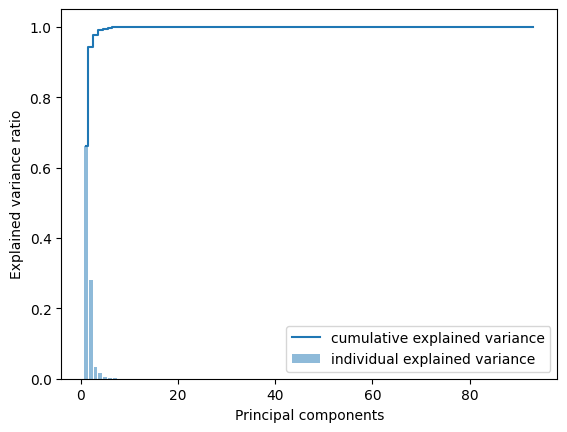

In [88]:
plt.bar(range(1,94), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,94),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [89]:

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(encoded_df,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D) 

In [90]:
Proj_data_df

,0,1,2,3
0,36.339535,139.673018,19.228280,28.436435
1,30.680873,134.335591,26.812813,31.151858
2,62.689796,135.392395,24.646369,34.991766
3,113.558508,144.787859,18.531322,33.494241
4,39.026442,138.895651,34.340892,38.932659
...,...,...,...,...
176606,6.162029,141.999619,30.950833,37.325648
176607,39.960177,100.935114,21.749081,27.588829
176608,17.404397,136.205491,20.615290,34.595135
176609,46.066344,166.740028,20.124302,35.309060


In [91]:
Proj_data_df.describe()


,0,1,2,3
count,176611.000000,176611.000000,176611.000000,176611.000000
mean,45.198777,139.429757,24.645928,31.943299
std,34.394386,22.446163,7.802757,5.176894
min,-132.798725,56.009587,-2.026087,-22.157582
25%,21.193222,124.688525,19.489177,29.672638
50%,39.345320,136.028437,23.042207,32.438496
75%,62.614520,150.078406,28.106326,34.925215
max,354.994060,307.548546,58.587490,71.564153


# 

# encoded_df["ratio"].describe() which is very much simliar to column 0
count    176611.000000
mean         42.912963
std          34.381663
min        -136.000000
25%          19.000000
50%          37.000000
75%          60.190979
max         352.103774
Name: ratio, dtype: float64
        ***************************************
encoded_df["weight"].describe() which is very much simliar to column 1    
count    176611.000000
mean        137.648529
std          21.428929
min          50.000000
25%         124.000000
50%         135.000000
75%         148.000000
max         300.000000
Name: weight, dtype: float64
this 'ratio' is derived from my reviewd column

In [92]:
Proj_data_df.head(20)

,0,1,2,3
0,36.339535,139.673018,19.228280,28.436435
1,30.680873,134.335591,26.812813,31.151858
2,62.689796,135.392395,24.646369,34.991766
3,113.558508,144.787859,18.531322,33.494241
4,39.026442,138.895651,34.340892,38.932659
5,25.231015,112.821515,18.442940,30.268751
6,11.319318,120.955268,50.493843,35.504223
7,13.874498,124.837057,20.934802,15.988199
8,111.490037,111.919970,25.167792,36.002800
9,-38.718763,138.465977,22.166711,30.910424


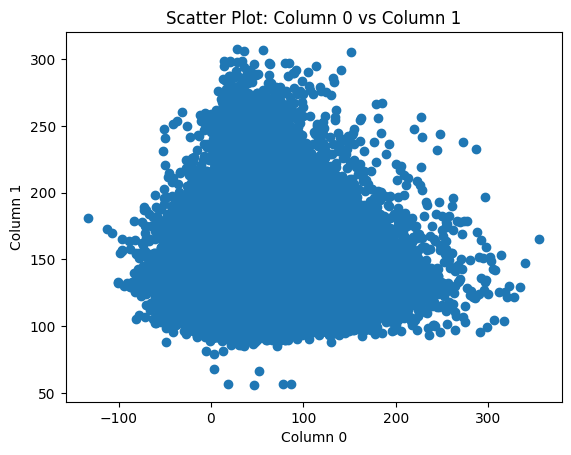

In [94]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named encoded_df
x = Proj_data_df.iloc[:, 0]  # Values from column 0
y = Proj_data_df.iloc[:, 1]  # Values from column 1

plt.scatter(x, y)
plt.xlabel('Column 0')
plt.ylabel('Column 1')
plt.title('Scatter Plot: Column 0 vs Column 1')
plt.show()
#this plot shows a cloud like sturcture means it has no dependencies on other, if we see any line which near to the value of 
#y=mx+c or a staight line. thas means our applied PCA is not working properly.


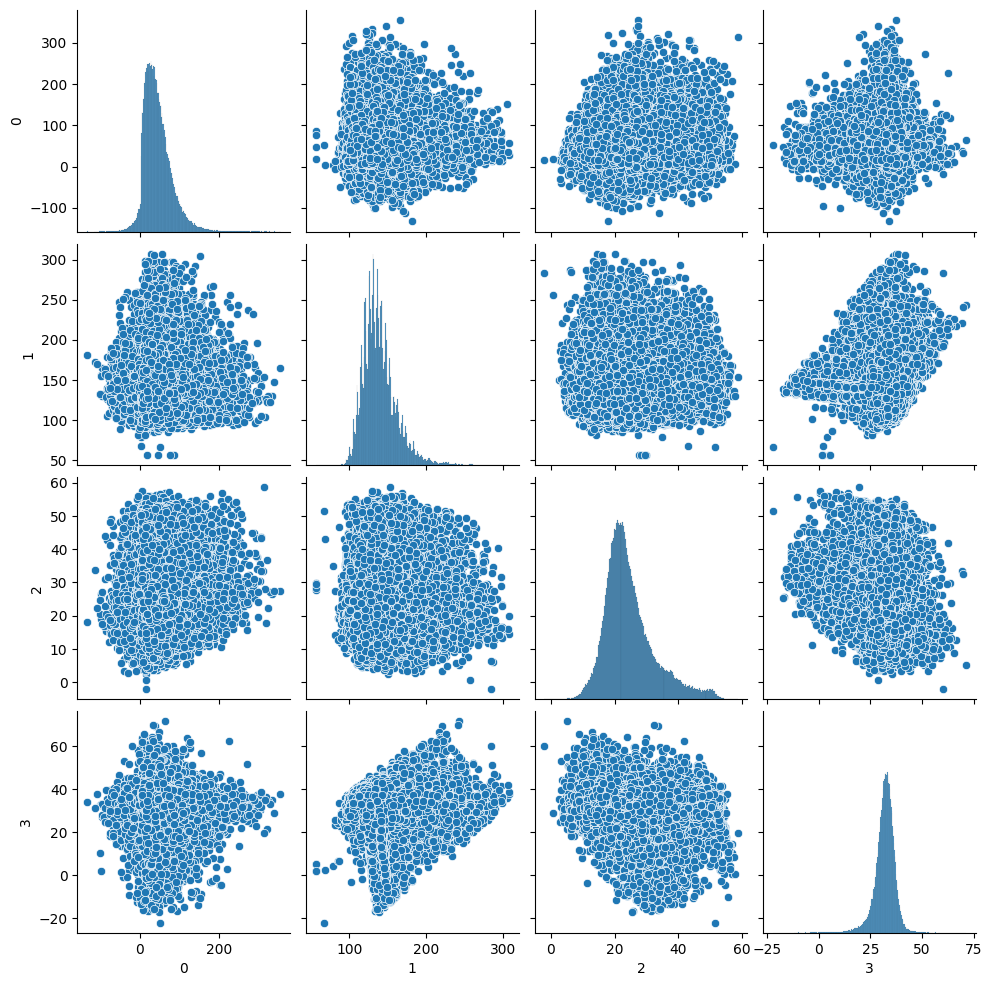

In [95]:
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame named projectdata
sns.pairplot(Proj_data_df)
plt.show()
#column 3 and column 0 shows kind of a straight line this means we can elimanate column 3 but rest wich shows a cloud like 
#stucture can't be eliminated 

In [ ]:
Proj_data_df.columns


# Build a Kmeans clustering model using the obtained optimal K value
from the elbow plot.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Define the range of K values to test
k_values = range(1, 11)  # Test K from 1 to 10 (inclusive)

# Initialize an empty list to store the sum of squared distances (SSE) for each K
sse = []

# Calculate SSE for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Proj_data_df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Plot for K-means Clustering')
plt.show()


# # Find the optimal K Value using elbow plot for K Means clustering.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming your DataFrame is named Proj_data_df
columns = Proj_data_df.columns.tolist()

# Extract the data from the DataFrame columns
data = Proj_data_df[columns].values

K = 4  # Replace 3 with the desired number of clusters

kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(data)

cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Assign a unique color to each cluster
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'brown', 'pink']

for i in range(K):
    # Extract data points belonging to the current cluster
    cluster_data = data[cluster_labels == i]
    
    # Plot the data points of the current cluster
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label='Cluster {}'.format(i+1))

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.legend()
plt.grid(True)
plt.show()

# Compute silhouette score for evaluating the quality of the K Means
clustering technique

# this code took 4 hours to complete in my, it is time consuming.
# so if needed we can reduce
# k_values = range(2, 11) to k_values = range(2, 7).
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Define the range of K values to test
k_values = range(2, 11)  # Test K from 2 to 10 (inclusive)

# Compute the silhouette score for each K
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(Proj_data_df)
    labels = kmeans.labels_
    score = silhouette_score(Proj_data_df, labels)
    print(score)
    silhouette_scores.append(score)

# Print the silhouette scores for each K
for k, score in zip(k_values, silhouette_scores):
    print("K =", k, " Silhouette Score:", score)


# Find the optimal K Value using dendrogram for Agglomerative clustering.
k=4 should be the best value. 

# Build a Agglomerative clustering model using the obtained optimal K
#value observed from dendrogram.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Define the desired size of the sampled dataset
sample_size = 10000  # Adjust this value according to your needs

# Randomly sample a subset of the data
np.random.seed(0)  # Set a seed for reproducibility
sampled_data = Proj_data_df.sample(n=sample_size, replace=False)

# Compute the linkage matrix
linkage_matrix = linkage(sampled_data, method='ward')

# Extract four clusters
k = 4
labels = fcluster(linkage_matrix, k, criterion='maxclust')

# Plot the dendrogram with color-coded clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, color_threshold=linkage_matrix[-k+1, 2], labels=labels)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram for Agglomerative Clustering (Sampled Data) - Four Clusters')
plt.show()



# Compute silhouette score for evaluating the quality of the Agglomerative
clustering technique.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Assuming your data is stored in the 'data' variable

# Specify the number of clusters (K)
n_clusters = 4

# Perform Agglomerative clustering
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
agglomerative_labels = agglomerative.fit_predict(sampled_data)

# Calculate the silhouette score
silhouette_avg = silhouette_score(sampled_data, agglomerative_labels)

print("Silhouette Score:", silhouette_avg)


# conclusion


# this plot shows a cloud like sturcture means it has no dependencies on other, if we see any line which near to the value of y=mx+c or a staight line. that means our applied PCA is not working properly in Proj_data_df

# column 3 and column 0 shows kind of a straight line this means we can elimanate column 3 but rest which shows a cloud like stucture can't be eliminated Proj_data_df

# for calculating silhouette_score from k (2-11), k=2 show the best ans 0.3976 which is very much closer to 1 but i think k=5 shows the best result 0.3019

# after applying PCA to any dataset, every column may loose its intigrity like when i try to retrive column name 
#columns 0 shows it belongs to weight and column 1 belongs to rating but their values describes that columns 0 belongs to ratio  which eventually derived from review_text, which i have mentioned earliar
and 
columns 1 describes that i t belong to weight.